First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset contains 7043 rows and 21 columns.


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract    

C:\Users\shano\AppData\Local\Temp\ipykernel_11880\4069477643.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="coolwarm")


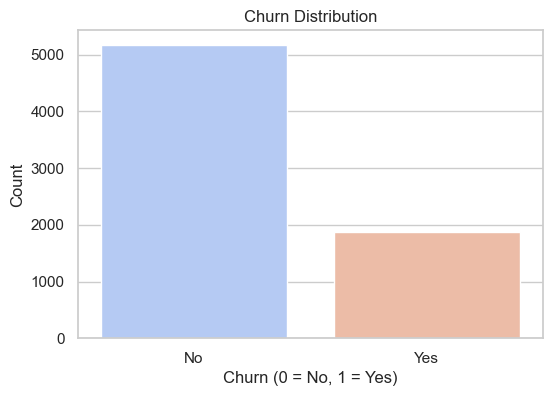

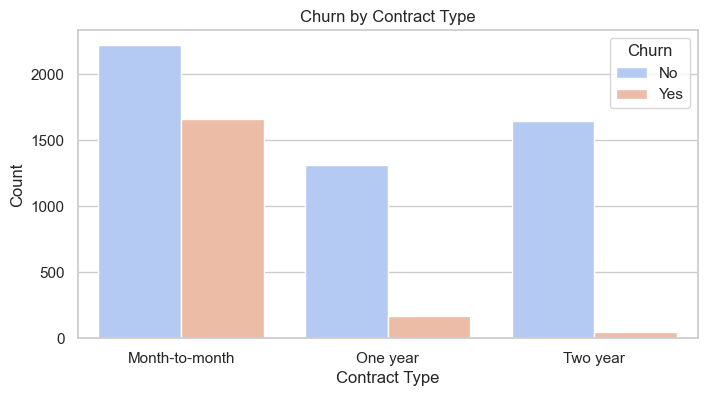

C:\Users\shano\AppData\Local\Temp\ipykernel_11880\4069477643.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")


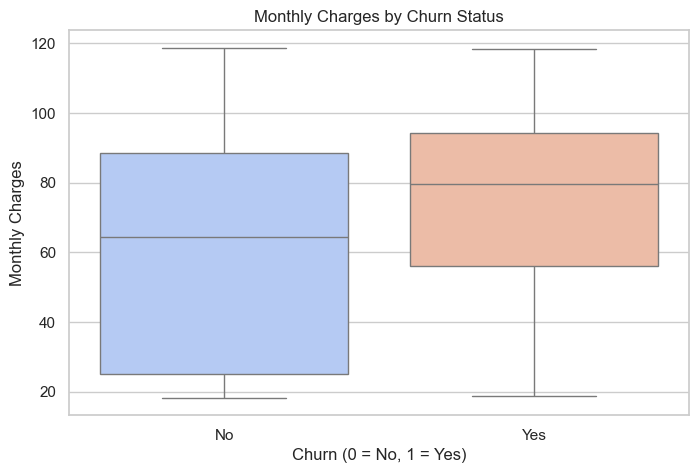

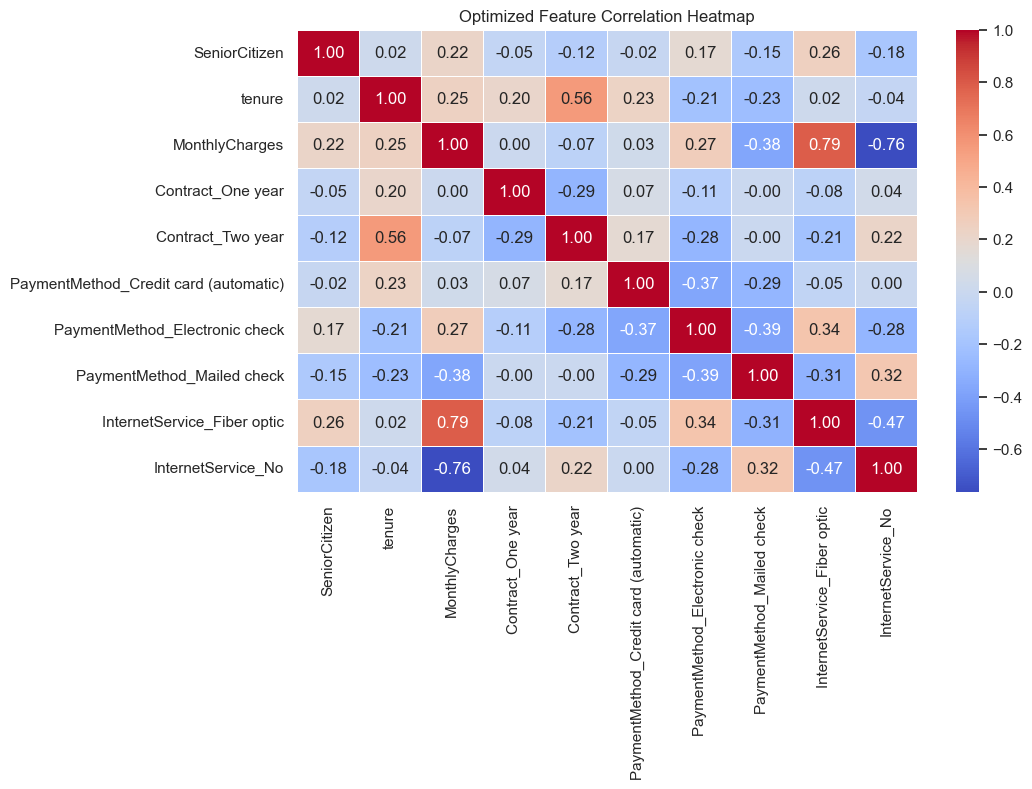


EDA Completed! ✅ Processed dataset saved.


In [1]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# 📌 Step 2: Load the Dataset
df = pd.read_csv("../data/raw/telco_customer_churn.csv")

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# 📌 Step 3: Basic Data Inspection
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display column data types and missing values
print("\nData Types and Missing Values:")
print(df.info())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Check target variable (Churn) distribution
print("\nTarget Variable Distribution (Churn):")
print(df["Churn"].value_counts(normalize=True) * 100)

# 📌 Step 4: Data Visualization

# 1️⃣ Churn Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Contract Type vs. Churn
plt.figure(figsize=(8, 4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

# 3️⃣ Monthly Charges vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()

# 📌 Step 5: Optimized Correlation Heatmap

# Select only numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Encode selected categorical columns to avoid excessive one-hot encoding
selected_categorical = ["Contract", "PaymentMethod", "InternetService"]  
df_encoded = df[num_cols].copy()
df_encoded = pd.concat([df_encoded, pd.get_dummies(df[selected_categorical], drop_first=True)], axis=1)

# Compute and visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Optimized Feature Correlation Heatmap")
plt.show()

# 📌 Step 6: Save Processed Data for Further Use
df.to_csv("../data/processed/telco_cleaned.csv", index=False)
print("\nEDA Completed! ✅ Processed dataset saved.")
